# Class Imbalanced

For a classifier to perform well, it needs to see equal number of points for each class. But when we collect data in the real world, it's not always possible to ensure that each class has the exact same number of data points. If one class has 10 times the number of data points of the other class, then the classifier tends to get biased towards the first class.

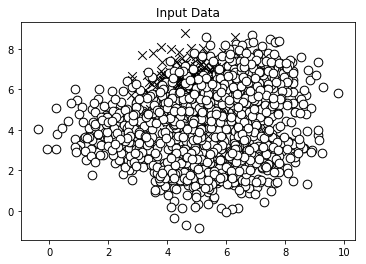

Classifier performance on training dataset
             precision    recall  f1-score   support

    Class-0       0.44      0.93      0.60       181
    Class-1       0.98      0.77      0.86       944

avg / total       0.89      0.80      0.82      1125

Classifier performance on test dataset
             precision    recall  f1-score   support

    Class-0       0.45      0.94      0.61        69
    Class-1       0.98      0.74      0.84       306

avg / total       0.88      0.78      0.80       375



In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load input data
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

plt.figure()
plt.scatter(class_0[:, 0], 
            class_0[:, 1], 
            s=75, 
            facecolors='black', 
            edgecolors='black', 
            linewidth=1, 
            marker='x')
plt.scatter(class_1[:, 0], 
            class_1[:, 1], 
            s=75, 
            facecolors='white', 
            edgecolors='black', 
            linewidth=1, 
            marker='o')
plt.title('Input Data')
plt.show()

# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Extremely random forest classifier
# Note that there is an input parameter called class_weight that controls whether or not
# we want to algorithmatically account for class imbalance
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}

classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)

# Predict
y_test_pred = classifier.predict(X_test)

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']

print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names=class_names))

